In [61]:
import requests
import pandas as pd
import matplotlib.pyplot as plt 
import acquire
import prepare
import seaborn as sns


In [48]:
df=acquire.get_merged_data()

In [51]:
df=prepare.prepare_merged_data(df)

In [82]:
df.head()

,Unnamed: 0_x,index_x,item_id,sale_amount,sale_id,store_id,Unnamed: 0_y,index_y,store_address,store_city,...,store_zipcode,Unnamed: 0,index,item_brand,item_name,item_price,item_upc12,item_upc14,month,year
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,0,1,13.0,1,1,0,0,12125 Alamo Ranch Pkwy,San Antonio,...,78253,0,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,1826,1826,1,12.0,1827,2,1,1,9255 FM 471 West,San Antonio,...,78251,20,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,1826,1826,1,12.0,1827,2,1,1,9255 FM 471 West,San Antonio,...,78251,0,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,5000,0,1,13.0,1,1,0,0,12125 Alamo Ranch Pkwy,San Antonio,...,78253,0,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,5000,0,1,13.0,1,1,0,0,12125 Alamo Ranch Pkwy,San Antonio,...,78253,20,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013


# Split data into train,test,val

In [87]:
train_size = .60
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]# everything up (not including) to the test_start_index
val=df[test_start_index:]
test = df[test_start_index:] # everything from the test_start_index to the end
train = df[:'2016'] # includes 2016
val=df['2017']
test = df['2017']



/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_15149/2706019873.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  val=df['2017']
/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_15149/2706019873.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


In [88]:
train.shape,val.shape,test.shape,df.shape

((34160, 21), (5840, 21), (5840, 21), (40000, 21))

In [89]:
train.head()

,Unnamed: 0_x,index_x,item_id,sale_amount,sale_id,store_id,Unnamed: 0_y,index_y,store_address,store_city,...,store_zipcode,Unnamed: 0,index,item_brand,item_name,item_price,item_upc12,item_upc14,month,year
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,0,1,13.0,1,1,0,0,12125 Alamo Ranch Pkwy,San Antonio,...,78253,0,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,1826,1826,1,12.0,1827,2,1,1,9255 FM 471 West,San Antonio,...,78251,20,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,1826,1826,1,12.0,1827,2,1,1,9255 FM 471 West,San Antonio,...,78251,0,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,5000,0,1,13.0,1,1,0,0,12125 Alamo Ranch Pkwy,San Antonio,...,78253,0,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,5000,0,1,13.0,1,1,0,0,12125 Alamo Ranch Pkwy,San Antonio,...,78253,20,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013


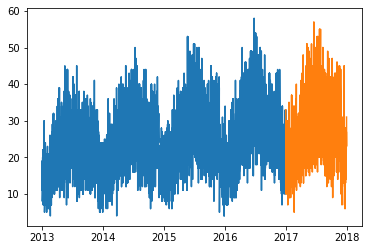

In [90]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

# Does the sale prices effect the amount of sale per month?


<AxesSubplot:xlabel='sale_amount', ylabel='month'>

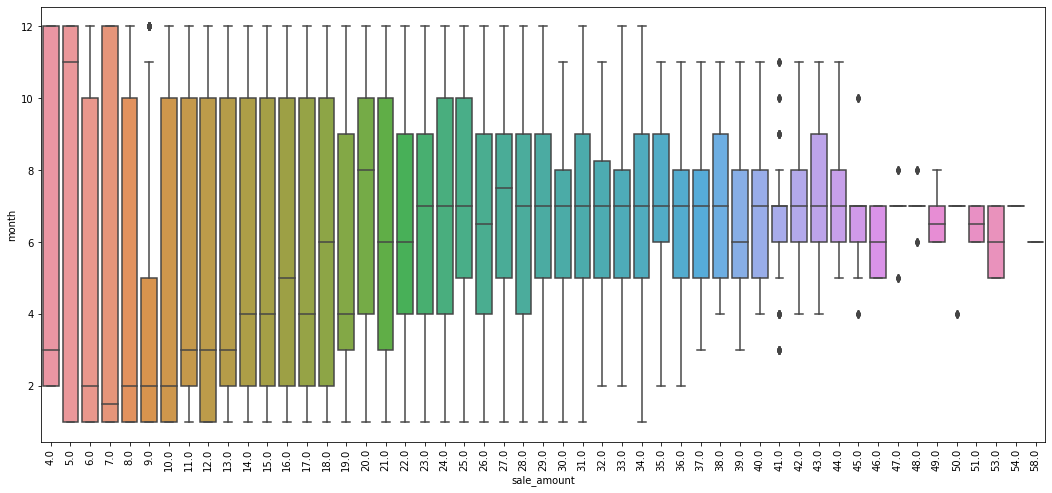

In [91]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='sale_amount',y='month')

<AxesSubplot:xlabel='sale_amount', ylabel='store_city'>

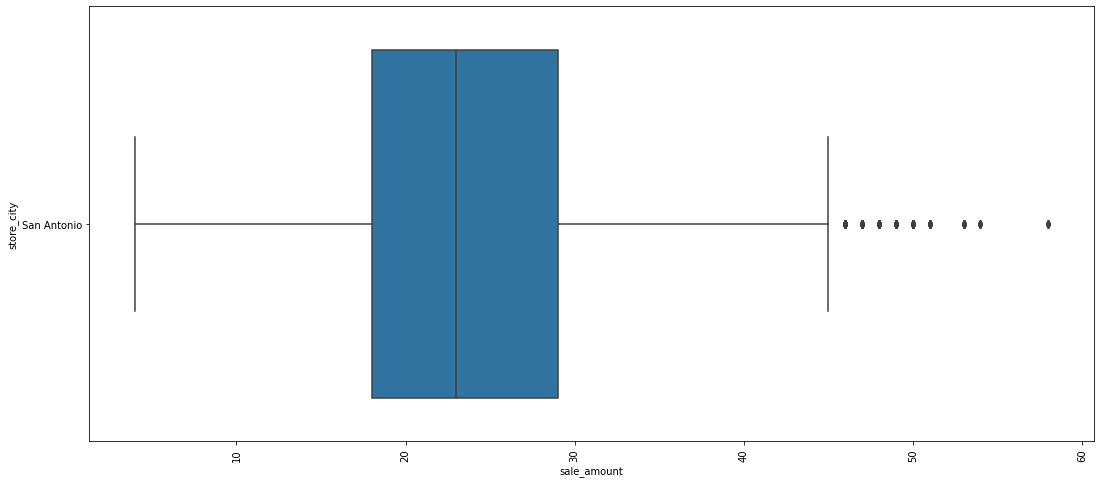

In [92]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='sale_amount',y='store_city')

<AxesSubplot:xlabel='item_price', ylabel='month'>

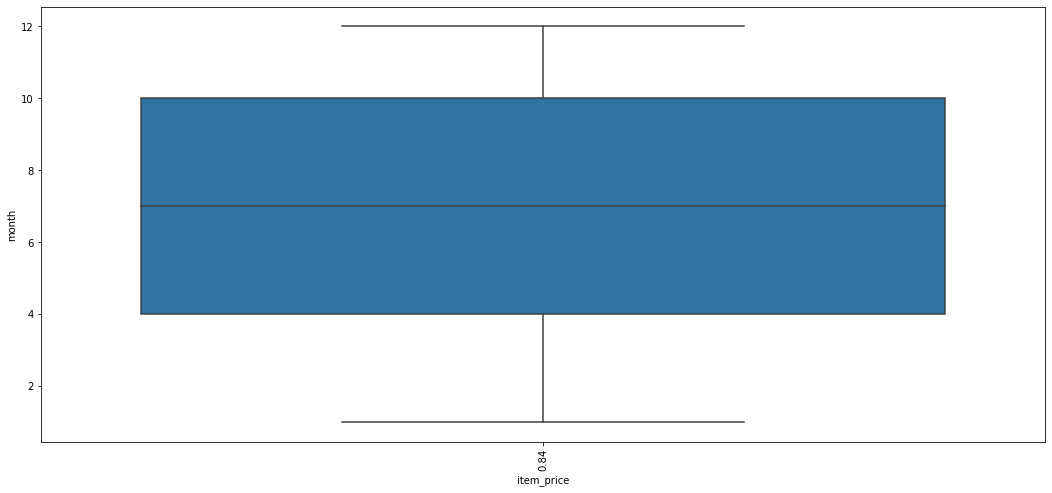

In [75]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='item_price',y='month')

<AxesSubplot:xlabel='sale_id', ylabel='month'>

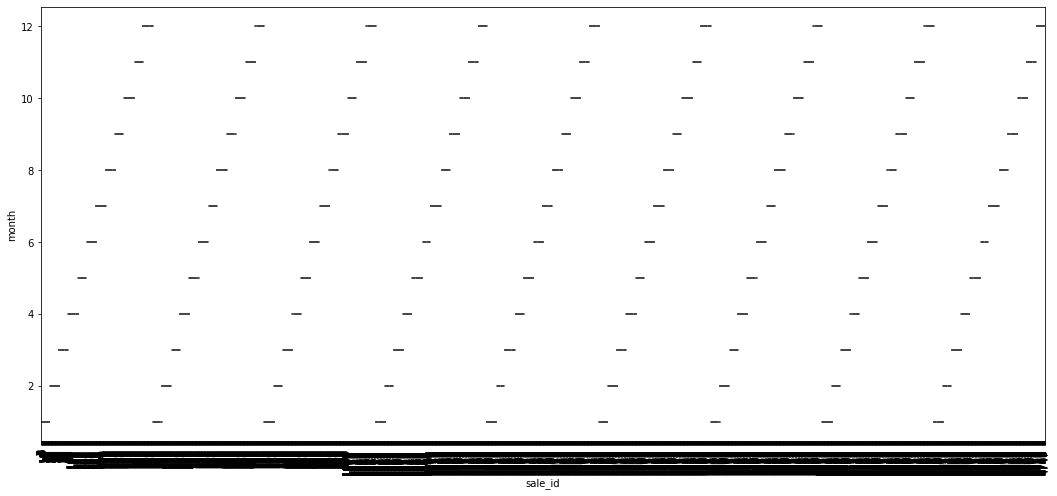

In [76]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='sale_id',y='month')

/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_15149/3162662566.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2015']


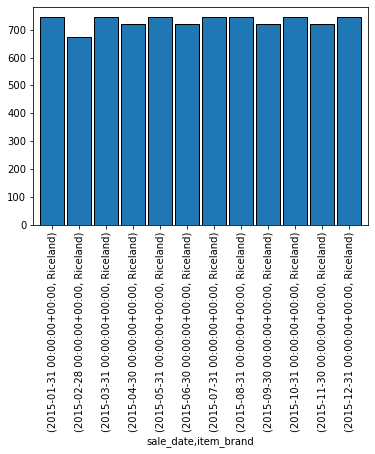

In [81]:
ax = (train['2015']
 .groupby('item_brand')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)


<AxesSubplot:xlabel='year', ylabel='month'>

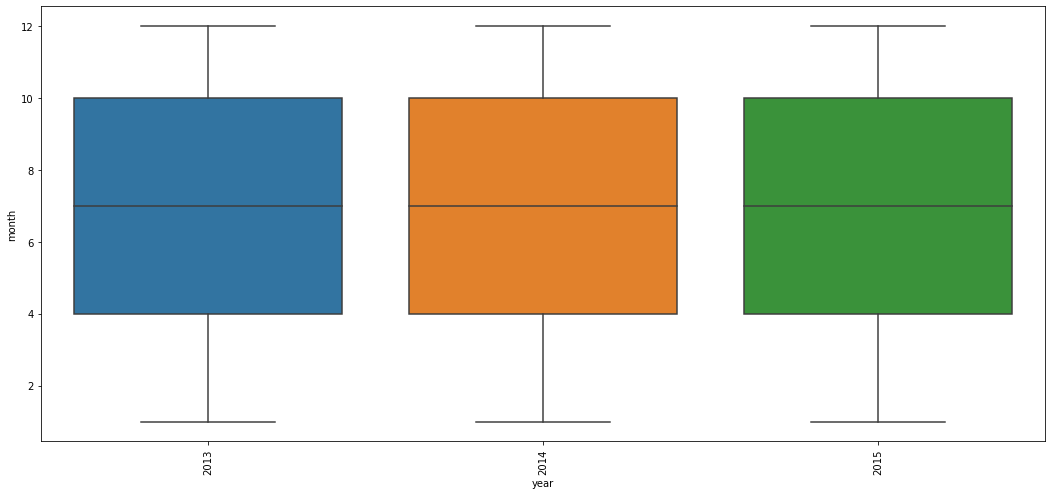

In [83]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='year',y='month')

<AxesSubplot:xlabel='sale_amount', ylabel='year'>

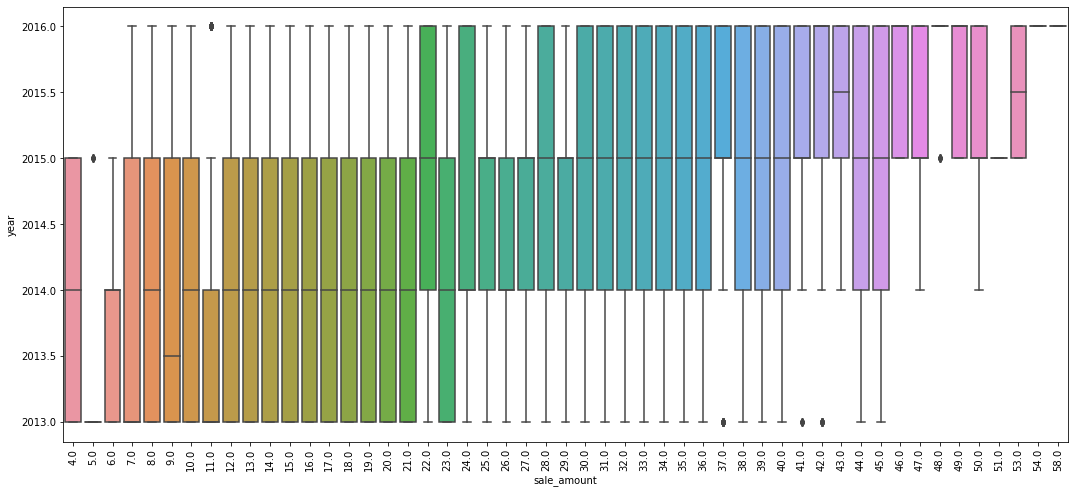

In [93]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='sale_amount',y='year')

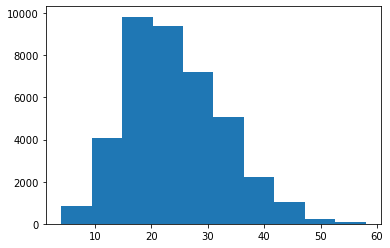

In [97]:
plt.hist(df.sale_amount)
plt.show()


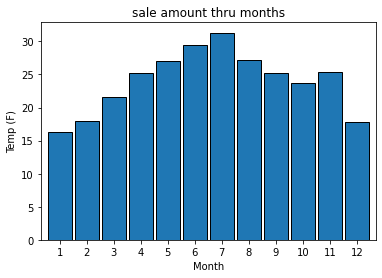

In [101]:
ax = df.sale_amount.groupby(df.sale_amount.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='sale amount thru months', xlabel='Month', ylabel='Temp (F)')
plt.show()

In [103]:
y = train.sale_amount
y.head()


sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    12.0
2013-01-01 00:00:00+00:00    12.0
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    13.0
Name: sale_amount, dtype: float64

<AxesSubplot:xlabel='weekday', ylabel='sale_amount'>

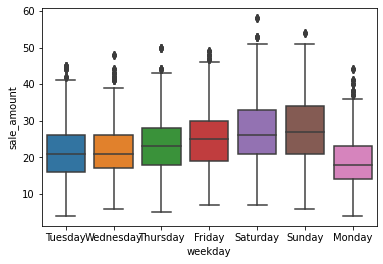

In [107]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.sale_date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='sale_amount', x='weekday')
)


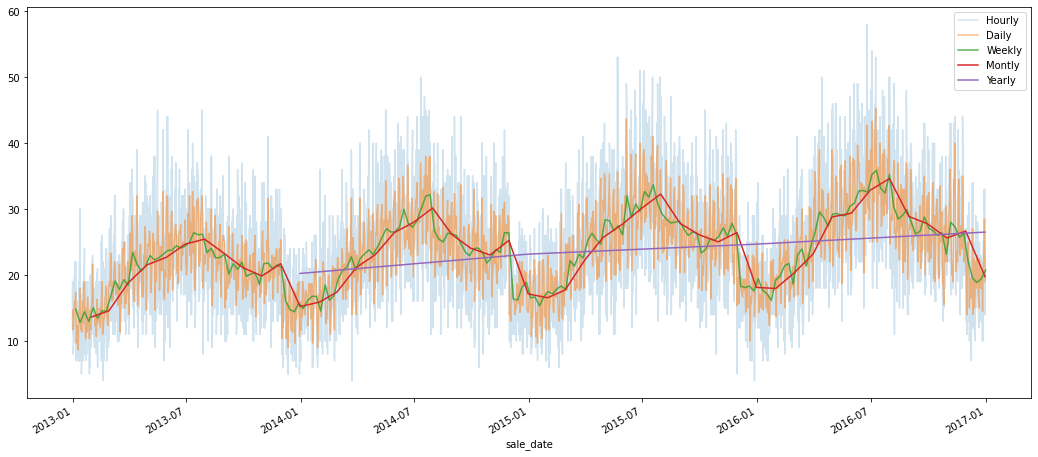

In [110]:
plt.figure(figsize=(18,8))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()


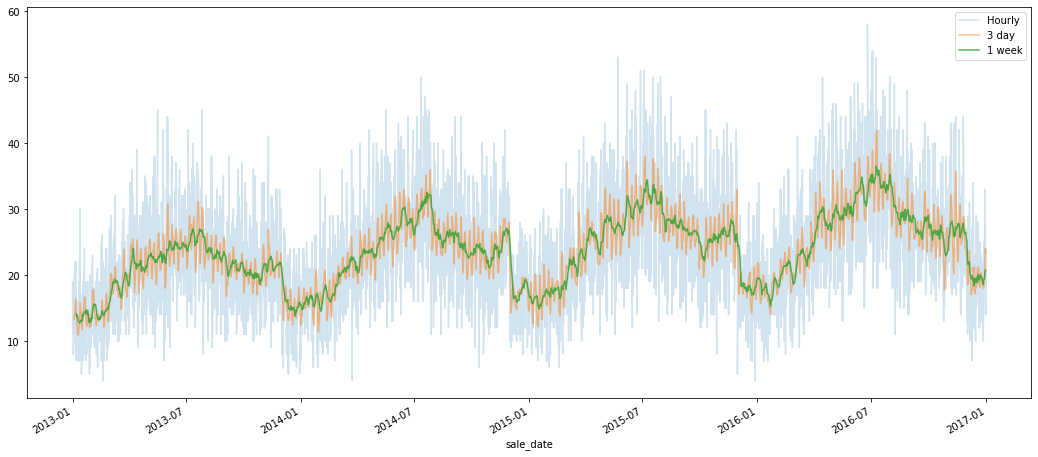

In [112]:
plt.figure(figsize=(18,8))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()
plt.show()

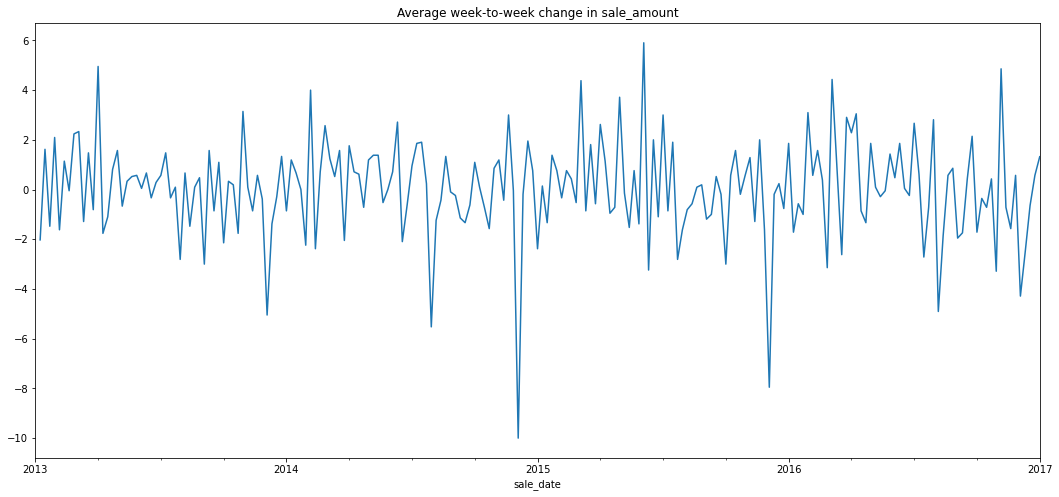

In [120]:
plt.figure(figsize=(18,8))
y.resample('w').mean().diff().plot(title='Average week-to-week change in sale_amount')
plt.show()

<Figure size 1296x576 with 0 Axes>

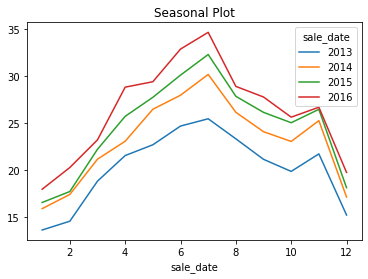

In [124]:
# .unstack turns an index level into columns
plt.figure(figsize=(18,8))
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

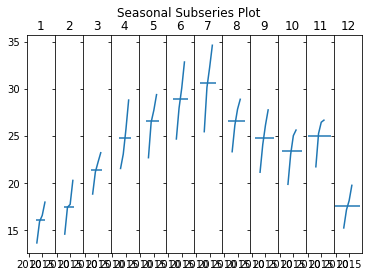

<Figure size 1296x576 with 0 Axes>

In [126]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
plt.figure(figsize=(18,8))
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)
